In [15]:
import tensorflow as tf

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [17]:
# loading libraries
print('Loading/Installing Package => Begin\n\n')
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import parse_parameters
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import load_dataset
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import install
# install("trimesh")
import os
from time import time
import glob
# import trimesh
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, History

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import json
tf.random.set_seed(1234)
print('\nLoading/Installing Package => End\n\n')

Loading/Installing Package => Begin



Loading/Installing Package => End




In [18]:
print('\n########################################################################')
print('Checking the running platforms\n')
# Call the function and retrieve the dataset_directory_path and simulation_directory_path
# Access the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()
print('########################################################################\n')


########################################################################
Checking the running platforms

Python version: 3.11.5
OS: Windows
OS version: 10
running on Colab: False
Dataset Directory Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Results Path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
########################################################################



In [19]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_label_items
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_labels_str
label_items_dict = get_label_items()
label_str_dict=get_labels_str(label_items_dict)

Aggregatring all parameters values
label_items:
 {'y_class_label_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'class_labels_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}


In [20]:
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import get_dataset
dataset_x, dataset_y=get_dataset(1000,label_str_dict, dataset_directory_path,working_column=1)

Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)
dataset.y(working_column) sample ['0.4' '0.4' '0.2' '0.4' '0.4' '0.3' '0.4' '0.3' '0.4' '0.4']


In [21]:
from jet_ml_models.pointnet import build_pointnet_classifier_model
from jet_ml_models.pointnet import compile_pointnet_classifier_model_with_hyperparam
NUM_POINTS = 1024
#ebcause alpha_s can get 3 values
NUM_CLASSES = 3

pointnet=build_pointnet_classifier_model(NUM_POINTS,NUM_CLASSES)
learning_rate=0.001
pointnet=compile_pointnet_classifier_model_with_hyperparam(pointnet,learning_rate)

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1024, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1024, 32)  │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024, 32)  │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024, 32)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1024, 64)  │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024, 64)  │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 1024, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1024, 512) │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024, 512) │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1024, 512) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 748,076 (2.85 MB)

 Trainable params: 741,996 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

Optimizer:  <keras.src.optimizers.adam.Adam object at 0x000002227107DED0>
Loss function:  categorical_crossentropy
Metrics:  ['loss', 'compile_metrics']


In [22]:
from jet_ml_models.pointnet import preprocess_dataset
(x_train,  y_train,x_test,  y_test)=preprocess_dataset(dataset_x, dataset_y)

Pre-processing
dataset_x_points shape: (1000, 1024, 3)
deleting the original dataset after splitting ...
train_points: <class 'numpy.ndarray'> 2457600 (800, 1024, 3)
train_y: <class 'numpy.ndarray'> 800 (800,)
x_test_points: <class 'numpy.ndarray'> 614400 (200, 1024, 3)
y_test: <class 'numpy.ndarray'> 200 (200,)
Preprocess y_train and y_test
One-hot encode the categorical variable
y_test:
 ['0.4' '0.2' '0.2' '0.4' '0.4' '0.2' '0.3' '0.3' '0.3' '0.2']
y_test_categorical:
 [['0.4']
 ['0.2']
 ['0.2']
 ['0.4']
 ['0.4']
 ['0.2']
 ['0.3']
 ['0.3']
 ['0.3']
 ['0.2']]
y_test_categorical_encoded:
 [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [23]:
monitor = 'val_accuracy'  # 'val_accuracy' or 'val_loss'
n_epochs = 50

print("simulation_directory_path:",simulation_directory_path)
simulation_path=f'{simulation_directory_path}jetml_pointnet_classification_alpha_s_{label_str_dict["alpha_s_items_str"]}'
print("simulation_path:",simulation_path)
current_simulation_name=f'_size_{1000}'
current_simulation_path=simulation_path+current_simulation_name
current_simulation_name=f'_epochs_{n_epochs}'
current_simulation_path=current_simulation_path+current_simulation_name
print(current_simulation_path)

fold=1
current_simulation_name=f'_fold_{fold}'
# fold_path=f'{current_simulation_path}_fold_{fold}'
current_simulation_path=current_simulation_path+current_simulation_name
# Use ModelCheckpoint callback to save the best model
best_model_file_path = f'{current_simulation_path}_best_model.keras'
print("best_model_file_path:",best_model_file_path)

simulation_directory_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
simulation_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2
best_model_file_path: D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_best_model.keras


In [24]:
# !pip install --upgrade tensorflow


In [25]:
from jet_ml_models.pointnet import train_model_with_callbacks
# %%timeit -n1 -r1
model, history, train_time=train_model_with_callbacks(pointnet, x_train, y_train, x_test, y_test, monitor, best_model_file_path, n_epochs)

Epoch 1/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2891 - loss: 50.7398
Epoch 1: val_accuracy improved from -inf to 0.37000, saving model to D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2899 - loss: 50.4051 - val_accuracy: 0.3700 - val_loss: 34.2272
Epoch 2/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3465 - loss: 35.6126
Epoch 2: val_accuracy did not improve from 0.37000
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3461 - loss: 35.6137 - val_accuracy: 0.3500 - val_loss: 34.0473


In [26]:
print(train_time)
print(model)
print(history.history)

1.1746217250823974
<Functional name=pointnet, built=True>
{'accuracy': [0.3100000023841858, 0.33500000834465027], 'loss': [42.03817367553711, 35.64270782470703], 'val_accuracy': [0.3700000047683716, 0.3499999940395355], 'val_loss': [34.22720718383789, 34.04728698730469]}


In [27]:
from jet_ml_models.pointnet import save_training_history
training_history_file_path_json,training_history_file_path_csv,training_history_file_path_csv = \
  save_training_history(history,current_simulation_path)

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_training_history.json
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_training_history.csv
D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_training_history.npy


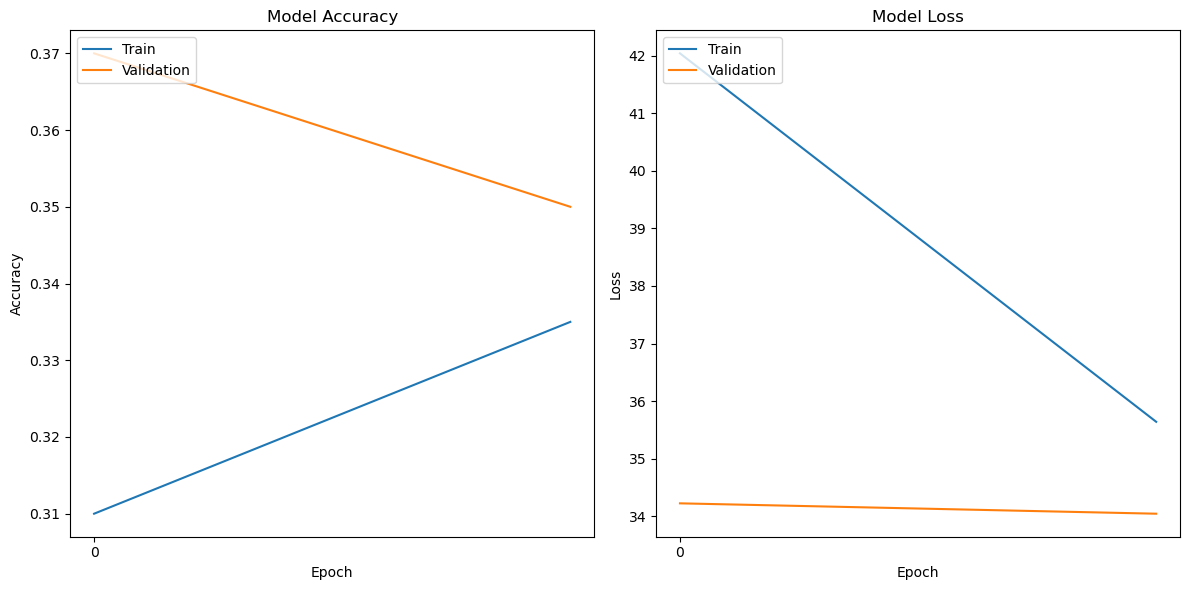

D:\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_alpha_s_0.2_0.3_0.4_size_1000_epochs_2_fold_1_accuracy_loss.png


In [28]:
from jet_ml_models.pointnet import plot_training_history
plot_training_history_path=plot_training_history(history,current_simulation_path)
print(plot_training_history_path)

In [29]:
from jet_ml_models.pointnet import evaluate_model
accuracy, confusion_matrix = evaluate_model(model, x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step
Accuracy: 0.35
Confusion Matrix: [[14 15 33]
 [14 22 38]
 [14 16 34]]
